# Modeling Distributions

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Binomial Distribution

Let's find the distribution of skeet-shooting competition.

In [98]:
np.random.seed(10)
flip = lambda n, p: np.random.choice([1,0], n, p=[p, 1-p])
pd.Series(flip(1000,0.9)).value_counts(normalize=True)

1    0.905
0    0.095
Name: proportion, dtype: float64

Here we define a function that returns us a list of ones or zeros, we can specify the probability of getting 1 with `p` parameter. Also, we can specify how many tries we want using `n` parameter.

In [99]:
sim = lambda n, p: flip(n,p).sum()

Let's think of ones as "the target is hit", and the zeros as "target is missed".

We defined a `sim` function where we can specify the number of tries and the probability of hittin the target, and get the successful hits out of all hits.

In [100]:
n = 25
p = 0.9
results_sim = [sim(n,p) for i in range(1000)]
np.array(results_sim).mean(), n*p

(np.float64(22.496), 22.5)

Out of 25 tries, 22.5 of the shootings were successful on average.

But instead of simulating, we can also calculate the mean by multiplying `n` with `p`. Why? Because skeet-shooting gives us a binomial distribution. But let's compare it to a standard (textbook, no simulations) binomial distribution to see how they look side by side.

Text(0.5, 1.0, 'Simulation results')

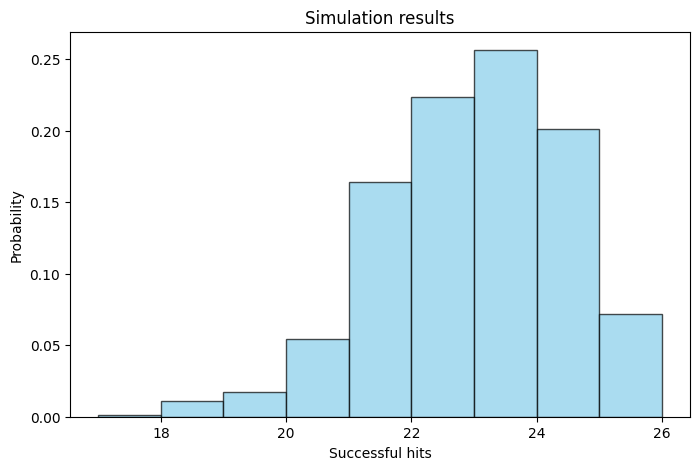

In [101]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(results_sim, bins=np.arange(17,27), density=True, align='mid', color="skyblue", alpha=0.7, edgecolor="black")
ax.set_xlabel("Successful hits")
ax.set_ylabel("Probability")
ax.set_title("Simulation results")

We see a distribution skewed to the left. Let's see how the textbook binomial distribution looks like for `p=0.9`.

In [102]:
from scipy.stats import binom

In [103]:
n, p

(25, 0.9)

In [104]:
x_theoretical = np.arange(0,n+1)
y_theoretical = binom.pmf(x_theoretical, n,p)
theoret_binom_freq = pd.DataFrame(y_theoretical, index=x_theoretical)
theoret_binom_freq

,0
0,1.000000e-25
1,2.250000e-23
2,2.430000e-21
3,1.676700e-19
4,8.299665e-18
5,3.137273e-16
6,9.411820e-15
7,2.299173e-13
8,4.655826e-12
9,7.914904e-11


In [105]:
skeet_freq = pd.Series(results_sim).value_counts(normalize=True).sort_index()
skeet_freq

16    0.001
17    0.001
18    0.011
19    0.017
20    0.054
21    0.164
22    0.223
23    0.256
24    0.201
25    0.072
Name: proportion, dtype: float64

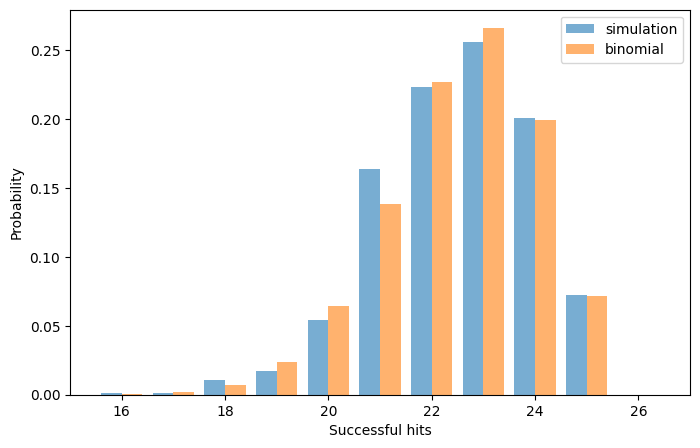

In [106]:
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.4
ax.bar(x=skeet_freq.index - width / 2, height=skeet_freq, width=width, alpha=0.6, label="simulation")
ax.bar(x=theoret_binom_freq.index + width / 2, height=theoret_binom_freq[0],width=width, alpha=0.6, label="binomial")
ax.set_xlabel("Successful hits")
ax.set_ylabel("Probability")
ax.set_xlim((15,27))
ax.legend()
plt.show()

They look very similar. But this is no surprise since we assumed that every shooting have the same success rate.

To put our simulation in a much stronger test, we are going to use real world data.

In [107]:
rw_skeet = pd.read_html("./data/Shooting_at_the_2020_Summer_Olympics_Mens_skeet.html")[6]
rw_skeet

,Rank,Athlete,Country,1,2,3,4,5,Total[3],Shoot-off,Notes
0,1,Éric Delaunay,France,25,25,25,24,25,124,+6,"Q, OR"
1,2,Tammaro Cassandro,Italy,24,25,25,25,25,124,+5,"Q, OR"
2,3,Eetu Kallioinen,Finland,25,25,24,25,24,123,NaN,Q
3,4,Vincent Hancock,United States,25,25,25,25,22,122,+8,Q
4,5,Abdullah Al-Rashidi,Kuwait,25,25,24,25,23,122,+7,Q
5,6,Jesper Hansen,Denmark,25,24,23,25,25,122,+5+8+20,Q
6,7,Jakub Tomeček,Czech Republic,24,25,25,25,23,122,+5+8+19,NaN
7,8,Nicolás Pacheco,Peru,24,24,25,25,24,122,+5+7,NaN
8,9,Georgios Achilleos,Cyprus,25,24,24,25,24,122,+3,NaN
9,10,Gabriele Rossetti,Italy,23,25,24,24,25,121 CB:37,NaN,NaN


Looks like `1,2,3,4,5` columns are the rounds. Let's get all the results and put it in a list.

In [108]:
rw_skeet
rw_flat = rw_skeet[["1","2","3","4","5"]].values.flatten()

In [109]:
rw_success_rate = rw_flat.mean() / 25
rw_success_rate

np.float64(0.9533333333333333)

Real-world success rate is much higher. Let's create a binomial distribution with `p=0.953333`

In [110]:
rw_pmf = pd.Series(rw_flat).value_counts(normalize=True).sort_index()
rw_pmf

19    0.013333
20    0.006667
21    0.006667
22    0.073333
23    0.246667
24    0.313333
25    0.340000
Name: proportion, dtype: float64

In [111]:
x_theoretical = np.arange(0,n+1)
y_theoretical = binom.pmf(x_theoretical, n,rw_success_rate)
binom_pmf = pd.DataFrame(y_theoretical, index=x_theoretical)
binom_pmf

,0
0,5.310917e-34
1,2.712361e-31
2,6.649160e-29
3,1.041385e-26
4,1.170071e-24
5,1.003921e-22
6,6.836221e-21
7,3.790615e-19
8,1.742329e-17
9,6.723177e-16


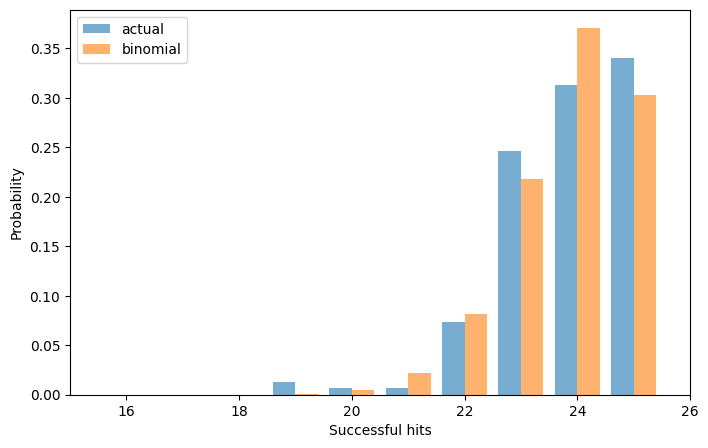

In [116]:
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.4
ax.bar(x=rw_pmf.index - width / 2, height=rw_pmf, width=width, alpha=0.6, label="actual")
ax.bar(x=binom_pmf.index + width / 2, height=binom_pmf[0],width=width, alpha=0.6, label="binomial")
ax.set_xlabel("Successful hits")
ax.set_ylabel("Probability")
ax.set_xlim((15,26))
ax.legend()
plt.show()

Binomial distribution is a good fit for the distribution of the real-world data.